In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
from diff_classifier.msd import binning, precision_weight, precision_averaging, plot_all_experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import scipy.stats as stats

In [ ]:
to_track

In [2]:
folder = '08_03_18_new_gel_validation'
bucket = 'hpontes.data'
experiment = 'COOH' #Used for naming purposes. Should exclude XY and well information

to_track = []
wells = 4
vids = 5
frames = 651
fps = 100.02

for well in range(1, wells+1):
    for num in range(1, vids+1):
        to_track.append('{}_t{}_XY{}'.format(experiment, well, num)) #As per usual, use for loops to include all experiments

slices, bins, well_names = binning(to_track, prefix=experiment)
geoM2xy = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geoM2xy[sample_name], gSEM[sample_name] = msd.gavg_MSDs(sample_name, remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with COOH_t1_XY1
Done with COOH_t1_XY2
Done with COOH_t1_XY3
Done with COOH_t1_XY4
Done with COOH_t1_XY5
Done with COOH_t2_XY1
Done with COOH_t2_XY2
Done with COOH_t2_XY3
Done with COOH_t2_XY4
Done with COOH_t2_XY5
Done with COOH_t3_XY1
Done with COOH_t3_XY2
Done with COOH_t3_XY3
Done with COOH_t3_XY4
Done with COOH_t3_XY5
Done with COOH_t4_XY1
Done with COOH_t4_XY2
Done with COOH_t4_XY3
Done with COOH_t4_XY4
Done with COOH_t4_XY5


In [ ]:
gSEM

In [3]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}
w_holder = {}
wh = {}
gh = {}

for key in bins:
    print(key)
    wo_slices[key], wh[key] = precision_weight(bins[key], gSEM)
    geo_slices[key], gSEM_slices[key], w_holder[key], gh[key] = precision_averaging(bins[key], geoM2xy, gSEM, wo_slices[key],
                                                            bucket=bucket, folder=folder, experiment=key) 

for key in geo_slices:
    geo_slices[key][geo_slices[key]==0.0] = np.nan
    gSEM_slices[key][gSEM_slices[key]==0.0] = np.nan
    
    geo_slices[key] = ma.masked_invalid(geo_slices[key])
    gSEM_slices[key] = ma.masked_invalid(gSEM_slices[key])
    
weights, wh1 = precision_weight(well_names, gSEM_slices)
geo, gS, w_holder1, gh1 = precision_averaging(well_names, geo_slices, gSEM_slices, weights, bucket=bucket, folder=folder, experiment=experiment)

COOH_W0


/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:586: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:631: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/weights
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:633: RuntimeWarning: divide by zero encountered in true_divide
  gSEM_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])


COOH_W1
COOH_W2
COOH_W3


In [ ]:
geo

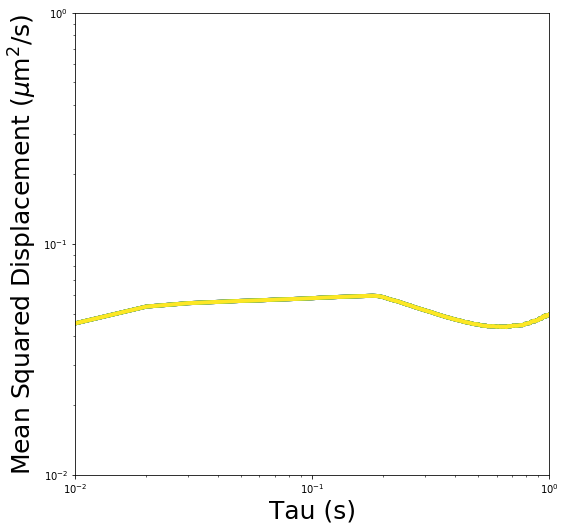

In [5]:
to_plot_f = [experiment, experiment, experiment, experiment, experiment, experiment]
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder, yr=(10**-2, 1))

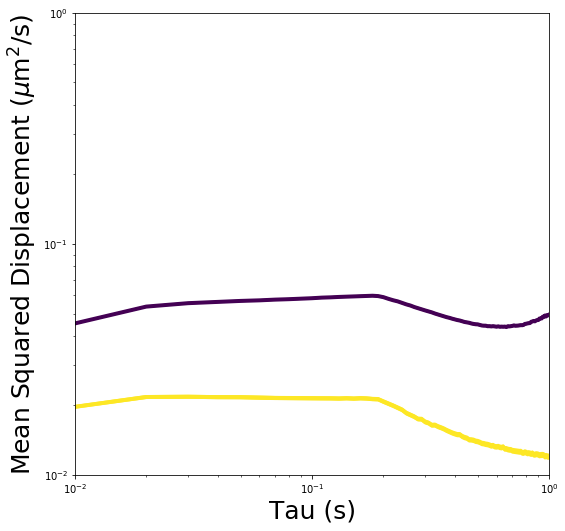

In [6]:
to_plot_f = ['COOH', 'NH2', 'NH2-PEG']
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder, yr=(10**-2, 1), xr=(10**-2, 10**0))

In [ ]:
to_plot = []
for key in geoM2xy:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
to_plot = []
for key in geo_slices:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
test = np.array([-5, -4, -3, -2, -1])
test = np.array([0.0001, 0.002, 0.03, 0.000005])
test2 = ma.log(test)
test2

In [ ]:
stats.sem(test)

In [ ]:
gSEM

In [ ]:
geoM2xy